# ML in Genomics 
## CullPDB Data Analysis
### Team Members:
    1. Hrishikesh Mahajan
    2. Pratik Kamble
    3. Smridhi Bhat
    4. Yash Shekhadar

In [1]:
import gzip as gz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Train.npy.gz", "r")
train_raw = np.load(f)
train_data = train_raw.reshape((len(train_raw), 700, 57))
train_x = train_data[:, :, 0:21]
train_y = train_data[:, :, 22:30]

In [5]:
print(f"Data Length = {len(train_raw)} ")
print(f"Train X Shape = {train_x.shape}")
print(f"Train Y Shape = {train_y.shape}")

Data Length = 5365 
Train X Shape = (5365, 700, 21)
Train Y Shape = (5365, 700, 8)


In [4]:
f = gz.GzipFile("/content/drive/MyDrive/MLG/CULLPDB-Test.npy.gz", "r")
test_raw = np.load(f)
test_data = test_raw.reshape((len(test_raw), 700, 57))
test_x = test_data[:, :, 0:21]
test_y = test_data[:, :, 22:30]

In [6]:
print(f"Data Length = {len(test_raw)} ")
print(f"Train X Shape = {test_x.shape}")
print(f"Train Y Shape = {test_y.shape}")

Data Length = 514 
Train X Shape = (514, 700, 21)
Train Y Shape = (514, 700, 8)


In [8]:
cnts = {"Loop":0,"Beta Bridge":0,"Beta Strand":0,"3-10 Helix":0,"Pi Helix":0,"Alpha Helix":0,"Bend":0,"Beta-Turn":0}
i2e = {0: "Loop",1: "Beta Bridge",2: "Beta Strand",3: "3-10 Helix",4: "Pi Helix",5: "Alpha Helix",6: "Bend",7: "Beta-Turn"}

for i in train_y:
    for j in i:
        if(np.array_equal(j, [0, 0, 0, 0, 0, 0, 0, 0])):
            break
        k = i2e[np.argmax(j)]
        cnts[k] += 1

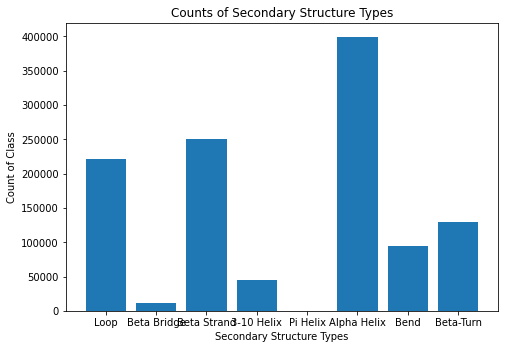

<Figure size 1944x1944 with 0 Axes>

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
stypes = list(cnts.keys())
counts = list(cnts.values())
ax.bar(stypes,counts)
plt.xlabel("Secondary Structure Types")
plt.ylabel("Count of Class")
plt.title("Counts of Secondary Structure Types")
plt.figure(figsize=(27, 27))
plt.show()

In [21]:
seq_lengths = []
for i in train_y:
    currlen = 0
    for j in i:
        if(np.array_equal(j, [0, 0, 0, 0, 0, 0, 0, 0])):
            break
        currlen+=1
    seq_lengths.append(currlen)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7203ee6e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7203ec2710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7203ee6250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7203edaa50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7203ec2fd0>,
  <matplotlib.lines.Line2D at 0x7f7203ec2290>]}

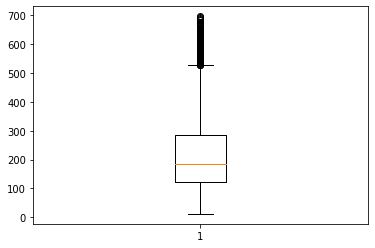

In [22]:
plt.boxplot(seq_lengths)